# Wolfram script

## Identificadores

Las variables en Mathematica se definen escribiendo `nombre = valor`, usando un simple signo de igualdad (el doble se reserva para la comparación como en `C`; también se puede retardar la evaluación de la parte derecha haciendo uso de `:=`). 

Los nombres de las variables siguen las convenciones normales, distinguiendo entre mayúsculas y minúsculas.

In [1]:
newvar=15

15

Después de esto, cada vez que se usa `newvar`, ésta se reemplaza por su valor (el valor que tenía al hacerse la asignación).

In [2]:
newvar^2-2^newvar

-32543

Podemos inhibir la salida con `;`. Cuando se usa `:=` también se inhibe la salida, pues no se evalua el identificador.

In [3]:
a:=1

In [4]:
b=2;

In [5]:
a+b

3

Las asignaciones son permanentes. Perduran hasta que se limpie su contenido con el comando `Clear`, o se les reasigne otro valor.

In [6]:
a=2

2

In [38]:
Clear[a,b]

In [8]:
a

a

## Definiendo funciones (I)

El que `WolframScript` sea un lenguage con programación funcional hace que definir funciones en este lenguaje sea muy parecido a cómo se hace en matemáticas, con la salvedad de que para salvar ambigüedades, los parámetros de una función se pasan dentro de corchetes. Por ejemplo, no queda claro en principio si la expresión `q(1-p)` simboliza a la función `q` evaluada en el punto `1-p`, o si es `q` veces `1-p`.

Para evitar esta posible confusión, `q[1-p]` denota la función `q` evaluada en `1-p`, y `q(1-p)` es  `q` veces `1-p`.

Vamos a definir una función areaCircle que calcule el área de un círculo. Escrito en papel sería algo así como `areaCirculo(r)= \pi r^2`.

Como queremos que la función se aplique no sólo al símbolo `r`, usamos lo que se conoce como un patrón de definición (nótese que usamos :=, y por lo tanto retardamos la evaluación de la parte derecha... ya discutiremos luego la diferencia). Conviene pensar en `r_` como "cualquier `r`".

In [10]:
areaCirculo[r_]:=\[Pi]*r

In [11]:
areaCirculo[2]

2 Pi

Al pedir la evaluación de `areaCirculo[10]`, WolframScript mira en su base de datos (de reglas de reescritura) y comprueba si existe alguna que empiece por `areaCirculo` y con un sólo argumento. Al usar el patrón `r_` en la definición de `areaCircle` (`r_` es un patrón que se traga cualquier argumento) `WolframScript` coloca `10` en  en cualquier lugar de la parte derecha de la igualdad en el que aparezca `r`. Como es normal el nombre del patrón es irrelevante (si usamos :=).

Los argumentos que pasemos a `areaCirculo` no tienen por qué ser números, por ejemplo, podemos escribir `areaCircle[19 c]`, y el argumento `19c` se amolda al patrón `r_`.

In [12]:
areaCirculo[19 c]

19 c Pi

Un ejemplo de una función con dos argumentos:

In [20]:
volumenCilindro[r_,h_]:=\[Pi] r^2 h

In [21]:
volumenCilindro[2,5]

20 Pi

## Comparando `=` con `:=`

La diferencia esencial entre `=` y `:=` es que cuando se usa la primera, el valor que se almacena en la variable o función es el que en ese momento tiene la parte derecha. Si usamos `:=`, lo que hacemos es retardar esa evaluación para cuando se llama a la función o se requiere el valor de la variable.


In [22]:
r=23

23

In [23]:
f[r_]=28 r

644

In [24]:
f[5]

644

In [25]:
f[6]

644

In [26]:
Clear[f,r]

Usando `:=` el comportamiento es distinto.

In [27]:
r=23

23

In [28]:
f[r_]:=28 r

In [30]:
f[5]

140

In [31]:
f[r]

644

## Manipulando polinomios y expresiones algebraicas

Dado un polinomio, `WolframScript` no lleva a cabo apenas ninguna manipulación salvo que se exprese explícitamente, ya que en principio no asume que queramos ver ese polinomio expresado de una u otra forma.

Entre las operaciones que automáticamente se llevan a cabo es ordenar los términos con respecto al grado.

In [32]:
2 x+x^2+1

2
1 + 2 x + x

y agrupar los de mismo grado

In [33]:
(1+2 x)+(4 x+3)

4 + 6 x

Sin embargo, `WolframScript` no expande, ni factoriza un polinomio, a no ser que se le pida hacerlo.

In [34]:
(x+3 y-5 z)^9

9
(x + 3 y - 5 z)

Para que se expanda una expresión hay que decirlo explícitamente. La orden que hace eso es `Expand` (con `%` hacemos mención a la salida anterior)

9       8          7  2         6  3          5  4          4  5          3  6
x  + 27 x  y + 324 x  y  + 2268 x  y  + 10206 x  y  + 30618 x  y  + 61236 x  y  + 
 
           2  7            8          9       8           7              6  2
>   78732 x  y  + 59049 x y  + 19683 y  - 45 x  z - 1080 x  y z - 11340 x  y  z - 
 
           5  3             4  4             3  5             2  6               7
>   68040 x  y  z - 255150 x  y  z - 612360 x  y  z - 918540 x  y  z - 787320 x y  z - 
 
            8          7  2          6    2           5  2  2           4  3  2
>   295245 y  z + 900 x  z  + 18900 x  y z  + 170100 x  y  z  + 850500 x  y  z  + 
 
             3  4  2            2  5  2              6  2            7  2
>   2551500 x  y  z  + 4592700 x  y  z  + 4592700 x y  z  + 1968300 y  z  - 
 
           6  3           5    3            4  2  3            3  3  3
>   10500 x  z  - 189000 x  y z  - 1417500 x  y  z  - 5670000 x  y  z  - 
 
              2  4  3               5  3            6  3          5  4
>   12757500 x  y  z  - 15309000 x y  z  - 7654500 y  z  + 78750 x  z  + 
 
             4    4            3  2  4             2  3  4               4  4
>   1181250 x  y z  + 7087500 x  y  z  + 21262500 x  y  z  + 31893750 x y  z  + 
 
              5  4           4  5            3    5             2  2  5
>   19136250 y  z  - 393750 x  z  - 4725000 x  y z  - 21262500 x  y  z  - 
 
                3  5             4  5            3  6             2    6
>   42525000 x y  z  - 31893750 y  z  + 1312500 x  z  + 11812500 x  y z  + 
 
                2  6             3  6            2  7                 7
>   35437500 x y  z  + 35437500 y  z  - 2812500 x  z  - 16875000 x y z  - 
 
              2  7              8               8            9
>   25312500 y  z  + 3515625 x z  + 10546875 y z  - 1953125 z
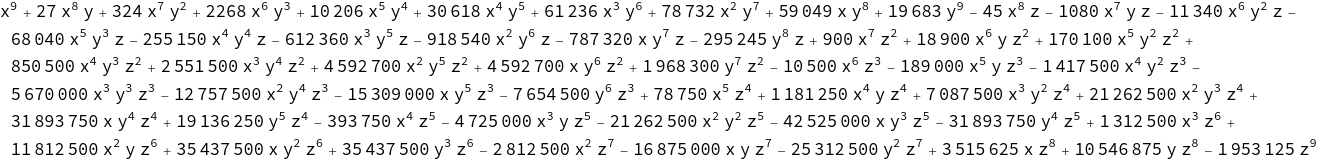

In [35]:
Expand[%]

`Simplify` se usa para simplificar una expresión, buscando entre las expresiones equivalentes a la dada que sea más simple.

In [36]:
Simplify[%]

9
(x + 3 y - 5 z)

`WolframScript` no simplifica automáticamente las dos partes de una ecuación. El operador  `==` devuelve `True` sólo si ambas partes son exactamente iguales, formalmente iguales, y no iguales en el sentido matemático.

In [39]:
(b+x) (b-x)==b^2-x^2

2    2
(b - x) (b + x) == b  - x

In [40]:
Simplify[%]

True

Si `WolframScript` no sabe decidir si existe o no igualdad, entonces deja la expresión tal cual es.

In [41]:
Clear[x]

In [42]:
x==2

x == 2

Si queremos comparar expresiones de forma más estrica (sintácticamente), usaremos `===`.

In [43]:
x===2

False

`Collect` se usa para recolectar términos respecto de una variable (expresa el polinomio como si fuese un polinomio en la variable que se quiera).

5      4         3  2       2  3        4    5
a  + 5 a  b + 10 a  b  + 10 a  b  + 5 a b  + b  + 
 
        4       3         2  2         3      4
>   (5 a  + 20 a  b + 30 a  b  + 20 a b  + 5 b ) c + 
 
         3       2           2       3   2        2                2   3
>   (10 a  + 30 a  b + 30 a b  + 10 b ) c  + (10 a  + 20 a b + 10 b ) c  + 
 
                 4    5
>   (5 a + 5 b) c  + c
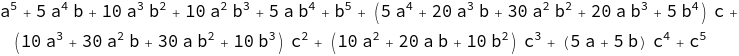

In [44]:
Collect[Expand[(a+b+c)^5],c]

`Coefficient` nos sirve para seleccionar el coeficiente de un término dado.

In [45]:
Coefficient[Expand[(a+b+c)^5],a^3]

2                2
10 b  + 20 b c + 10 c

`Factor` factoriza...

In [46]:
Factor[x^9+1]

2        3    6
(1 + x) (1 - x + x ) (1 - x  + x )

Para determinar las variables de un polinomio podemos utilizar `Variables`

In [47]:
Variables[Expand[(a+b+c)^5]]

{a, b, c}

In [48]:
Exponent[(1+x) (1-x-x^2) (1-x),x]

4

Véase también `PolynomialMod`, `PolynomialQuotient`, `PolynomialRemainder`, `PolynomialGCD`, `PolynomialLCM`, `FactorList`, `CoefficientList`, `InterpolatingPolynomial`

`WolframScript` no sólo hace simplificaciones con polinomios, sino con tras muchas funciones matemáticas predefinidas.

In [49]:
(Csc[x]Tan[w])/(Cot[x] Sec[w])

Sec[x] Sin[w]

A veces hay que indicarle precisamente qué tipo de función está tratando para manipularla. Por ejemplo, `TrigExpand` expande funciones trigonométricas.

In [50]:
TrigExpand[Sin[\[Alpha]+\[Beta]+\[Gamma]]]

Cos[β] Cos[γ] Sin[α] + Cos[α] Cos[γ] Sin[β] + Cos[α] Cos[β] Sin[γ] - Sin[α] Sin[β] Sin[γ]

`TrigToExp` convierte funciones trigonométricas a su forma exponencial.

In [51]:
TrigToExp[ Cos[z]+I Sin[z]]

I z
E

`ExpToTrig` hace lo contrario.

In [52]:
ExpToTrig[%]

Cos[z] + I Sin[z]

`FullSimplify` calcula la forma equivalente a la dada más simple posible cuando trata con funciones especiales.

In [53]:
FullSimplify[Abs[z] Exp[I Arg[z]]]

z

Ver también `FunctionExpand`, `TrigReduce`

## Definiciones de funciones (II)

Revisitamos ahora la definición de funciones para introducir métodos un poco más potentes para definir una función. Las definiones que hemos visto hasta ahora son de la forma.

In [54]:
func[z_]:=1+z^10

El cuerpo de la función puede ser tan complicado como sea necesario, y puede contener expresiones compuestas. Esto se hace de la siguiente forma.

In [55]:
setXandY[xval_,yval_]:=(X=xval;Y=yval;Print["X es ahora ",X,", e Y es ahora ",Y])

In [56]:
setXandY[3,2]

X es ahora 3, e Y es ahora 2


In [57]:
X/Y

3
-
2

In [58]:
Clear[func,X,Y,setXandY]

Podemos sacarle un poco más de jugo a los patrones (más adelante volveremos sobre este extenso tema) para hacer que la función se evalúe sólo en algunos tipos de entrada predeterminados. Veamos unas cuantas formas alternativas de definir el factorial. La que viene a continuación se asemeja mucho a la definición que se pueda dar en una clase de matemáticas elemental (salvo por los corchetes).

In [59]:
fac[n_]:=n fac[n-1];fac[0]:=1

In [60]:
{fac[35],35!}

{10333147966386144929666651337523200000000, 10333147966386144929666651337523200000000}

De hecho, la función factorial sería deseable que se aplicase sólo a enteros... Para conseguir esto, especificamos un poco mejor el patrón. Para conocer el "tipo" de una expresión usamos la función `Head`.  

En el caso de números los posibles valores son `Integer`, `Rational`, `Real`, y `Complex`. (Esta función nos muestra la cabecera de la expresión tal y como la almacena `WolframScript`, para ver la expresión al completo, úsese `FullForm`.)

In [61]:
Head[3]

Integer

In [62]:
Head[1/2]

Rational

In [63]:
Head[1.2]

Real

In [64]:
Head[3+3 I]

Complex

In [65]:
Head[2+3]

Integer

In [66]:
Clear[x]; Head[x+3]

Plus

Antes de dar una nueva definición de factorial, borramos la anterior.

In [67]:
Clear[fac]

In [68]:
fac[n_Integer]:=n fac[n-1];fac[0]:=1

In [69]:
fac[35]

10333147966386144929666651337523200000000

In [70]:
fac[1.2]

fac[1.2]

Otra restricción buena es hacer que sólo trabaje con enteros que sean positivos. Para ello introducimos una forma de condicional que se obtiene usando el operador `/;`, el cual se pone detrás del cuerpo de definición de la función y se puede leer como "siempre que" o "para" .

In [71]:
Clear[fac]

In [72]:
fac[n_Integer]:=n fac[n-1]/;n>0

In [73]:
fac[0]:=1

In [74]:
fac[10]

3628800

In [75]:
fac[-1]

fac[-1]

Una forma "clásica" de definir el factorial (quizás más acorde con lo que estais acostumbrados) podría ser:

In [77]:
Clear[f]
f[n_Integer]:=If[n>=0,If[n==0,1,n f[n-1]],Print["Indefinido"]]

## Substituciones con reglas

Supongamos que queremos substituir `y` por un valor determinado en la fórmula `Sqrt[x^2 + y^2]`. Una forma de hacerlo es la siguiente. Si por ejemplo el valor que queremos para `y` es 7, hacemos

In [79]:
y=7;
Sqrt[x^2+y^2]

2
Sqrt[49 + x ]

El problema claro está, es que de esta forma, todas las expresiones que contengan a la variable `y`se verán afectadas por esta asignación hasta que liberemos el valor. Por ejemplo, al intentar resolver una ecuación respecto de `y`, `WolframScript` substituye el valor 7 en `y`, obteniendo un resultado posiblemente no deseado.

In [81]:
Solve[y^10+x^10==1,y]

Solve::ivar: 7 is not a valid variable.

10
Solve[282475249 + x   == 1, 7]

In [82]:
Clear[y]

10 1/10               10 1/10               1/5       10 1/10
{{y -> -(1 - x  )    }, {y -> (1 - x  )    }, {y -> -((-1)    (1 - x  )    )}, 
 
              1/5       10 1/10               2/5       10 1/10
>   {y -> (-1)    (1 - x  )    }, {y -> -((-1)    (1 - x  )    )}, 
 
              2/5       10 1/10               3/5       10 1/10
>   {y -> (-1)    (1 - x  )    }, {y -> -((-1)    (1 - x  )    )}, 
 
              3/5       10 1/10               4/5       10 1/10
>   {y -> (-1)    (1 - x  )    }, {y -> -((-1)    (1 - x  )    )}, 
 
              4/5       10 1/10
>   {y -> (-1)    (1 - x  )    }}
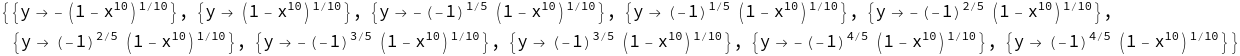

In [83]:
Solve[y^10+x^10==1,y]

Para hacer esto un poco mejor, lo que se usa normalmente son las reglas de substitución. Esto se hace mediante los operadores  `/.` y `->`. Las expresiones de la forma `cambiaesto -> porestootro` se llaman reglas. Mathematica lleva a cabo la substitución o conjunto de substituciones descritas por las reglas que se colocan detras de  `/.`.  En general, la sintaxis es  expresión `/. cambiaesto -> porestootro`.

In [84]:
Sqrt[x^2 + y^2] /. y -> 7

2
Sqrt[49 + x ]

In [85]:
y

y

Se pueden hacer otro tipo de substituciones, como por ejemplo

In [86]:
Sqrt[x^2 + y^2] /. y -> 1 + a

2    2
Sqrt[(1 + a)  + x ]

O incluso

In [87]:
FullForm[{1,2,3}]
{1,2,3} /. List -> Plus

List[1, 2, 3]
6

Podemos también hacer varias substituciones a la vez pasando todas las reglas como una lista.

In [89]:
a+b^2+c^3 /. {a->\[Alpha], b->\[Beta], c->\[Gamma]}

2    3
α + β  + γ

O bien distintos conjuntos de substituciones... pasando una lista de lista de reglas.

In [90]:
Sqrt[x^2 + y^2] /. {{x->3, y->4}, {x->5, y->12}, {x->1, y->1}}

{5, 13, Sqrt[2]}

Ojo con hacer lo siguiente (los comentarios van entre `(*` y `*)`), el símbolo `//` se usa para otro propósito como veremos después.

In [91]:
Log[(1-x) x] /. {x->0.35, x->0.55} (* incorrecto *)

-1.48061

Mathematica hace las substituciones de izquierda a derecha, por lo que al hacer la primera, para la segunda no queda variable que substituir.

In [92]:
Log[(1-x) x] /. {{x->0.35}, {x->0.55}} (* correcto *)

{-1.48061, -1.39634}

Un ejemplo combinando reglas con la salida de la funcion `Solve`: 

In [93]:
solset=Solve[x^2-1==0,x]
x^2-1==0/.solset

{{x -> -1}, {x -> 1}}
{True, True}

Para generar una lista con las soluciones escribimos

In [95]:
x/.solset

{-1, 1}

Las versiones prefijas de /. y de -> son ReplaceAll y Rule, respectivamente.

In [96]:
ReplaceAll[x^2, x->2]

4

In [97]:
ReplaceAll[x^2,Rule[x,2]]

4

Al igual que ocurría con las asignaciones, el operador `->` tiene su versión "perezosa" o retardada. Para que la evaluación de la parte derecha se produzca en el momento de aplicar la regla, utilizamos `:>` en vez de `->` (la evaluación de la parte izquierda se efectua siempre en los dos casos, a diferencia de `:=` y de `=`). Compárese 

In [98]:
Table[x,{5}]/. x-> Random[]

{0.384527, 0.384527, 0.384527, 0.384527, 0.384527}

con

In [100]:
Table[x, {5}] /. x:> Random[]

{0.930645, 0.582083, 0.863377, 0.777119, 0.194822}

La versión prefija de `:>` es `RuleDelayed`.

Si queremos que una regla se aplique tantas veces como sea posible (hasta que no sea aplicable más), entonces en vez del operador `/.` usamos `//.`.

Compárese 

In [101]:
{a,b,c} /. {c->b, b->a}

{a, a, b}

con

In [102]:
{a,b,c} //. {c->b, b->a}

{a, a, a}

## Listas y funciones

### Listas y algunas funciones que generan listas

Las listas en `WolframScript` se introducen encerrando entre llaves los elementos, los cuales vienen separados por comas. Otra forma de introducir listas es con la función `List`. 

Las listas no tienen por qué ser homogéneas (esto es, los elementos no tienen que ser del mismo tipo).

In [103]:
{1,x,2+y^2,Sin[x],{2}}==List[1,x,2+y^2,Sin[x],{2}]

True

La lista vacía se representa por {}.

Mathematica tiene muchas funciones para crear listas. Por ejemplo, la función `Range` genera una lista de números. Tiene diversas formas de ser utilizada, dependiendo del número de argumentos que introduzcamos.

In [104]:
Range[15]

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [105]:
Range[10,15]

{10, 11, 12, 13, 14, 15}

In [106]:
Range[10,20,2]

{10, 12, 14, 16, 18, 20}

Otra función útil puede ser `Table`, la  cual ya ha aparecido antes.

In [107]:
Table[N[Log[Prime[i]]],{i,1,5}]

{0.693147, 1.09861, 1.60944, 1.94591, 2.3979}

In [108]:
Table[i+j,{i,1,10,2},{j,10,20}]

{{11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}, 
 
>   {13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}, 
 
>   {15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}, 
 
>   {17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}, 
 
>   {19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29}}

Las matrices son listas de filas.

11   12   13   14   15   16   17   18   19   20   21

13   14   15   16   17   18   19   20   21   22   23

15   16   17   18   19   20   21   22   23   24   25

17   18   19   20   21   22   23   24   25   26   27

19   20   21   22   23   24   25   26   27   28   29
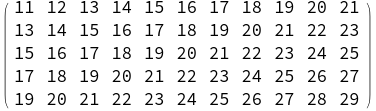

In [109]:
MatrixForm[%]

Véase `Part`, `Extract`, `Take`, `Drop`, `Append`, `AppendTo`, `Prepend`, `PrependTo`, `Insert`, `Delete`, `Join`, `Intersection`, `Union` 

### Usando funciones con listas

Los patrones que se usan en las listas son:
- `{_}` para lista con un sólo elemento,
- `{__}` (dos espacios) para lista con uno o más elementos,
- `{___}` (tres espacios) para una lista con cero o más elementos.

In [110]:
longitud[{}]:=0
longitud[{_,x___}]:=1+longitud[{x}]

In [112]:
longitud[{1,2,3}]

3

Veamos un ejemplo de cómo calcular las componentes conexas de un grafo no dirigido.

In [113]:
componentes[{vs_, ls_}] := Union[Map[{#} &, vs], ls] //. 
{xs___, {as___, x_, bs___}, ys___, {cs___, x_, ds___},  zs___} :> {xs, Union[{as, x, bs}, {cs, ds}], ys, zs}

`Map` sirve para aplicar una función a una lista. En este caso, estamos conviertiendo una lista en una lista de listas de elementos usando `{#}&`, que es una [función anónima](https://www.wolfram.com/language/elementary-introduction/2nd-ed/26-pure-anonymous-functions.html)

In [114]:
Map[{#}&,{1,2,3}]

{{1}, {2}, {3}}

In [115]:
componentes[{{1, 2, 3, 4, 5, 6}, {{1, 2}, {2, 3}, {4, 5}}}]

{{1, 2, 3}, {4, 5}, {6}}

En `WolframScript` tenemos también $\lambda$-expresiones

In [127]:
Function[x,x^2+1][2]

5

Podemos usar una variable anónima y una función pura.

In [126]:
(#^2+1)&[2]

5

También nos podemos ahorrar `Map` usando `/@`.

In [124]:
(#^2+1)&/@{1,2,3}

{2, 5, 10}

O usar más de un argumento

In [128]:
(#1+#2)&[1,2]

3